# Caricamento del dataset videogames_Sales2024

In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
# Percorso al file CSV
file_path = '../datasets/videogames_sales2024.csv'

# Caricamento del datasets
df = pd.read_csv(file_path)

# Mostra l'intero datasets
from IPython.display import display
display(df)

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64011,/games/boxart/full_2779838AmericaFrontccc.jpg,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-11,2019-01-28
64012,/games/boxart/full_8031506AmericaFrontccc.jpg,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64013,/games/boxart/full_6553045AmericaFrontccc.jpg,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64014,/games/boxart/full_6012940JapanFrontccc.png,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-28,2019-02-24


# Rimozione feature img

In [259]:
df.drop('img', axis=1, inplace=True)
df

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64011,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-11,2019-01-28
64012,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64013,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64014,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-28,2019-02-24


# Pulizia del dataset

In [260]:
# Stampa dei tipi del dataset (Facoltativo)
# print(df.dtypes)

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna('Unknown')
    else:
        df[col] = df[col].fillna(0.0)

# Stampa delle colonne dopo il filtraggio
columns_with_nan = df.columns[df.isnull().any()]
if not columns_with_nan.empty:
    print("Colonne con valori NaN:", list(columns_with_nan))
else:
    print("Non ci sono colonne con valori NaN.")
df

Non ci sono colonne con valori NaN.


,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,Unknown
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,Unknown
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,0.0,15.86,9.06,0.06,5.33,1.42,2013-09-17,Unknown
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64011,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,0.0,0.00,0.00,0.00,0.00,0.00,2016-08-11,2019-01-28
64012,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,0.0,0.00,0.00,0.00,0.00,0.00,2020-07-30,2020-05-09
64013,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,0.0,0.00,0.00,0.00,0.00,0.00,2020-07-30,2020-05-09
64014,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,0.0,0.00,0.00,0.00,0.00,0.00,2019-02-28,2019-02-24


# Modifica della data di rilascio (Conversione a solo anno)

In [261]:
# Conversione delle date di rilascio in formato int (solo anno), escludendo 'Unknown'
df.loc[df['release_date'] != 'Unknown', 'release_date'] = pd.to_datetime(
    df.loc[df['release_date'] != 'Unknown', 'release_date'], errors='coerce'
).dt.year.astype('Int64')

# Conversione di last_update come la colonne release_date
df.loc[df['last_update'] != 'Unknown', 'last_update'] = pd.to_datetime(
    df.loc[df['last_update'] != 'Unknown', 'last_update'], errors='coerce'
).dt.year.astype('Int64')

# Stampa del dataset aggiornato
df

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013,Unknown
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014,2018
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002,Unknown
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,0.0,15.86,9.06,0.06,5.33,1.42,2013,Unknown
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64011,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,0.0,0.00,0.00,0.00,0.00,0.00,2016,2019
64012,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,0.0,0.00,0.00,0.00,0.00,0.00,2020,2020
64013,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,0.0,0.00,0.00,0.00,0.00,0.00,2020,2020
64014,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,0.0,0.00,0.00,0.00,0.00,0.00,2019,2019


# Controllo valore massimo di Critic_Score

In [262]:
# Calcolo e stampa del valore massimo per ogni colonna
max_value = df['critic_score'].max()
print(max_value)

10.0


# Stampa boxplot per Critic_Score

La mediana di critic_score è pari a 7.5


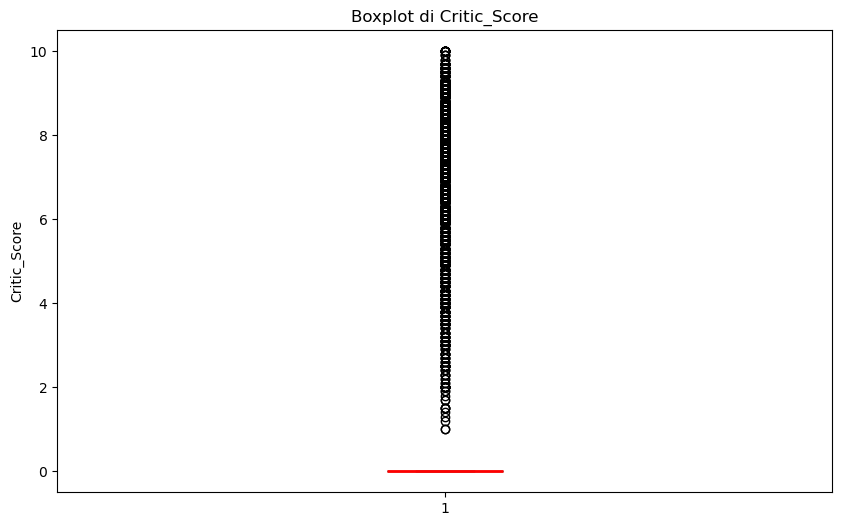

In [263]:
import matplotlib.pyplot as plt

df_no_zeros = df[df['critic_score'] != 0.0]
mediana_critic_score = df_no_zeros['critic_score'].median()
print(f"La mediana di critic_score è pari a {mediana_critic_score}")

# Stampa boxplot per critic_score
plt.figure(figsize=(10, 6))
plt.boxplot(df['critic_score'].dropna(), patch_artist=True, medianprops=dict(color="red", linewidth=2))
plt.title('Boxplot di Critic_Score')
plt.ylabel('Critic_Score')
plt.show()

# Stampa dei range interquartili per critic_score

In [264]:
# Stampa del range interquartile
critic_score = df_no_zeros['critic_score'].dropna()
Q1 = np.percentile(critic_score, 25)
Q3 = np.percentile(critic_score, 75)
IQR = Q3 - Q1
#Stampa degli interquartili
print("Q1:", Q1, "Q3:", Q3, "IQR:", IQR)

Q1: 6.4 Q3: 8.3 IQR: 1.9000000000000004


# Stampa del barplot delle vendite globali

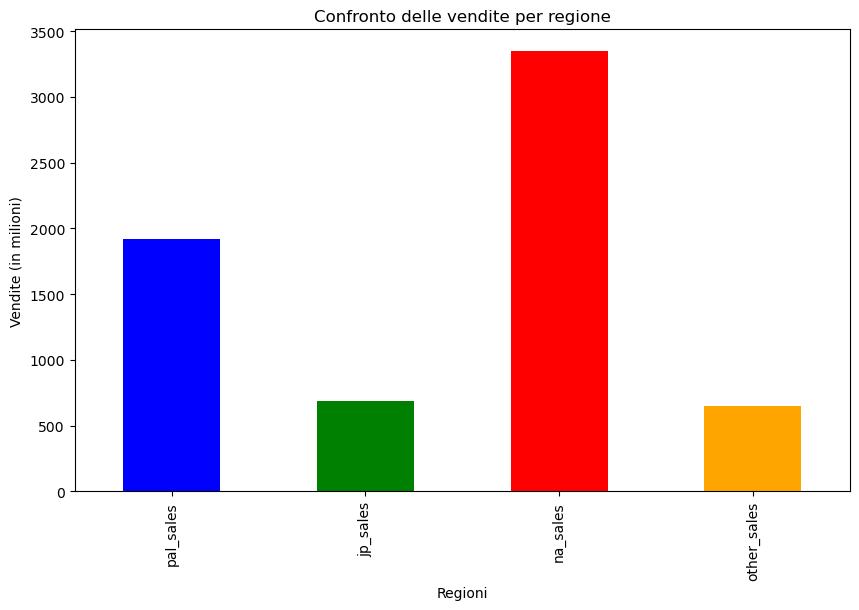

In [265]:
# Barplot che visualizza e confronta il numero delle vendite dei giochi che sono state effettuate in Europa, Giappone, Nord America e altre regioni

# Calcola la somma delle vendite per ogni colonna
sales_sums = df[['pal_sales', 'jp_sales', 'na_sales', 'other_sales']].sum()

# Crea il barplot
sales_sums.plot(kind='bar', figsize=(10, 6), title='Confronto delle vendite per regione',
                color=['blue', 'green', 'red', 'orange'])
plt.ylabel('Vendite (in milioni)')
plt.xlabel('Regioni')
plt.show()

# Confronto tra le vendite globali nel 2016 e 2024

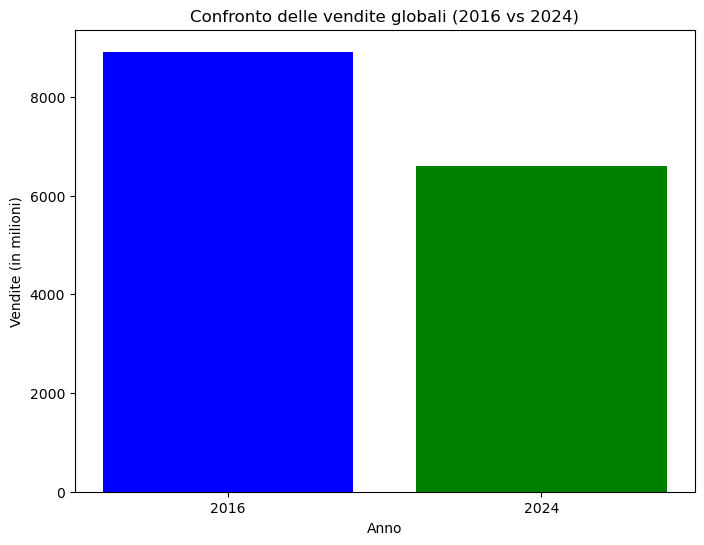

In [266]:
# Caricamento dei dataset
df_2016 = pd.read_csv('../datasets/videogames_sales2016.csv')

# Pulizia del dataset 2016
df_2016['Rating'] = df_2016['Rating'].fillna('RP')
df_2016['User_Score'] = pd.to_numeric(df_2016['User_Score'], errors='coerce')
columns_to_update = ['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
for column in columns_to_update:
    if column in df_2016.columns:
        df_2016[column] = df_2016[column].fillna(0.0)
df_2016['Publisher'] = df_2016['Publisher'].fillna("Unknown")
df_2016['Developer'] = df_2016['Developer'].fillna("Unknown")
df_2016['Year_of_Release'] = df_2016['Year_of_Release'].fillna("Unknown")
df_2016 = df_2016.dropna(subset=['Name'])

# Estrazione delle colonne rilevanti
global_sales_2016 = df_2016['Global_Sales'].sum()
total_sales_2024 = df['total_sales'].sum()

# Generazione del barplot
plt.figure(figsize=(8, 6))
plt.bar(['2016', '2024'], [global_sales_2016, total_sales_2024], color=['blue', 'green'])
plt.title('Confronto delle vendite globali (2016 vs 2024)')
plt.ylabel('Vendite (in milioni)')
plt.xlabel('Anno')
plt.show()